<a href="https://colab.research.google.com/github/anshugupta742/data-analytics-projects/blob/main/CTR-Prediction/ctr_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ad_click_prediction_train (1) (1).csv to Ad_click_prediction_train (1) (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Ad_click_prediction_train = pd.read_csv("Ad_click_prediction_train (1) (1).csv")

In [ ]:
Ad_click_prediction_train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [ ]:
Ad_click_prediction_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [ ]:
Ad_click_prediction_train.columns


Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')

In [ ]:
Ad_click_prediction_train['DateTime'] = pd.to_datetime(Ad_click_prediction_train['DateTime'])

Ad_click_prediction_train['hour'] = Ad_click_prediction_train['DateTime'].dt.hour
Ad_click_prediction_train['month'] = Ad_click_prediction_train['DateTime'].dt.month
Ad_click_prediction_train['day'] = Ad_click_prediction_train['DateTime'].dt.day
Ad_click_prediction_train['day_of_week'] = Ad_click_prediction_train['DateTime'].dt.dayofweek
Ad_click_prediction_train['is_weekend'] = Ad_click_prediction_train['day_of_week'].isin([5, 6]).astype(int)

def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'

Ad_click_prediction_train['time_of_day'] = Ad_click_prediction_train['hour'].apply(get_time_of_day)

In [ ]:
Ad_click_prediction_train['user_product_interaction'] = (
    Ad_click_prediction_train['user_id'].astype(str) + "_" + Ad_click_prediction_train['product'].astype(str)
)

Ad_click_prediction_train['campaign_webpage'] = (
    Ad_click_prediction_train['campaign_id'].astype(str) + "_" + Ad_click_prediction_train['webpage_id'].astype(str)
)

Ad_click_prediction_train['gender_age'] = (
    Ad_click_prediction_train['gender'].astype(str) + "_" + Ad_click_prediction_train['age_level'].astype(str)
)

In [ ]:
user_agg = Ad_click_prediction_train.groupby('user_id').agg(
    user_total_views=('is_click', 'count'),
    user_total_clicks=('is_click', 'sum'),
    user_sessions=('session_id', 'nunique')
)

user_agg['user_ctr'] = (
    user_agg['user_total_clicks'] / user_agg['user_total_views']
)

Ad_click_prediction_train = Ad_click_prediction_train.merge(user_agg, on='user_id', how='left')

In [ ]:
product_agg = Ad_click_prediction_train.groupby('product').agg(
    product_views=('is_click', 'count'),
    product_clicks=('is_click', 'sum')
)

product_agg['product_ctr'] = (
    product_agg['product_clicks'] / product_agg['product_views']
)

Ad_click_prediction_train = Ad_click_prediction_train.merge(product_agg[['product_views', 'product_ctr']], on='product', how='left')

In [ ]:
campaign_agg = Ad_click_prediction_train.groupby('campaign_id').agg(
    campaign_views=('is_click', 'count'),
    campaign_clicks=('is_click', 'sum')
)

campaign_agg['campaign_ctr'] = (
    campaign_agg['campaign_clicks'] / campaign_agg['campaign_views']
)

Ad_click_prediction_train = Ad_click_prediction_train.merge(campaign_agg[['campaign_views', 'campaign_ctr']],on='campaign_id',how='left')

In [ ]:
Ad_click_prediction_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   session_id                463291 non-null  int64         
 1   DateTime                  463291 non-null  datetime64[ns]
 2   user_id                   463291 non-null  int64         
 3   product                   463291 non-null  object        
 4   campaign_id               463291 non-null  int64         
 5   webpage_id                463291 non-null  int64         
 6   product_category_1        463291 non-null  int64         
 7   product_category_2        97437 non-null   float64       
 8   user_group_id             445048 non-null  float64       
 9   gender                    445048 non-null  object        
 10  age_level                 445048 non-null  float64       
 11  user_depth                445048 non-null  float64       
 12  ci

In [ ]:
print(Ad_click_prediction_train['product_category_2'].nunique())
print(Ad_click_prediction_train['user_group_id'].nunique())
print(Ad_click_prediction_train['gender'].nunique())
print(Ad_click_prediction_train['age_level'].nunique())
print(Ad_click_prediction_train['user_depth'].nunique())
print(Ad_click_prediction_train['city_development_index'].nunique())

29
13
2
7
3
4


In [ ]:
cols_with_nan = ['product_category_2', 'user_group_id', 'gender', 'age_level', 'user_depth', 'city_development_index']

for col in cols_with_nan:
    Ad_click_prediction_train[col].fillna(
        Ad_click_prediction_train[col].mode()[0],
        inplace=True
    )

/tmp/ipython-input-1059654010.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ad_click_prediction_train[col].fillna(


In [ ]:
cat_encode_cols = ['product','campaign_id','webpage_id','product_category_1','product_category_2','gender','user_group_id','var_1','user_product_interaction',
    'campaign_webpage','gender_age','time_of_day'
]

from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in cat_encode_cols:
    le = LabelEncoder()
    Ad_click_prediction_train[col] = le.fit_transform(
        Ad_click_prediction_train[col].astype(str)
    )
    label_encoders[col] = le

In [ ]:
drop_cols = ['DateTime', 'session_id', 'user_id']

Ad_click_prediction_train.drop(drop_cols, axis=1, inplace=True)

In [ ]:
X = Ad_click_prediction_train.drop(columns=['is_click'])
y = Ad_click_prediction_train['is_click']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
scale_cols = ['user_ctr','product_ctr','campaign_ctr']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=-1,
        random_state=42
    )
}

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

result = []

for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_prob = model.predict_proba(X_test)[:, 1]

  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_prob)

  result.append({
      'Model':name,
      'Precision':precision,
      'Recall':recall,
      'F1-Score':f1,
      'ROC-AUC':roc_auc
  })


results_df = pd.DataFrame(result).sort_values(
    by="ROC-AUC", ascending=False
)

results_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 345567, number of negative: 345567
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2740
[LightGBM] [Info] Number of data points in the train set: 691134, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Precision,Recall,F1-Score,ROC-AUC
4,LightGBM,0.686648,0.425950,0.525756,0.949243
0,Logistic Regression,0.361402,0.804820,0.498813,0.941773
3,Random Forest,0.537402,0.417332,0.469817,0.931351
2,Decision Tree,0.399821,0.428663,0.413740,0.693900
1,KNN,0.082028,0.373444,0.134510,0.549685


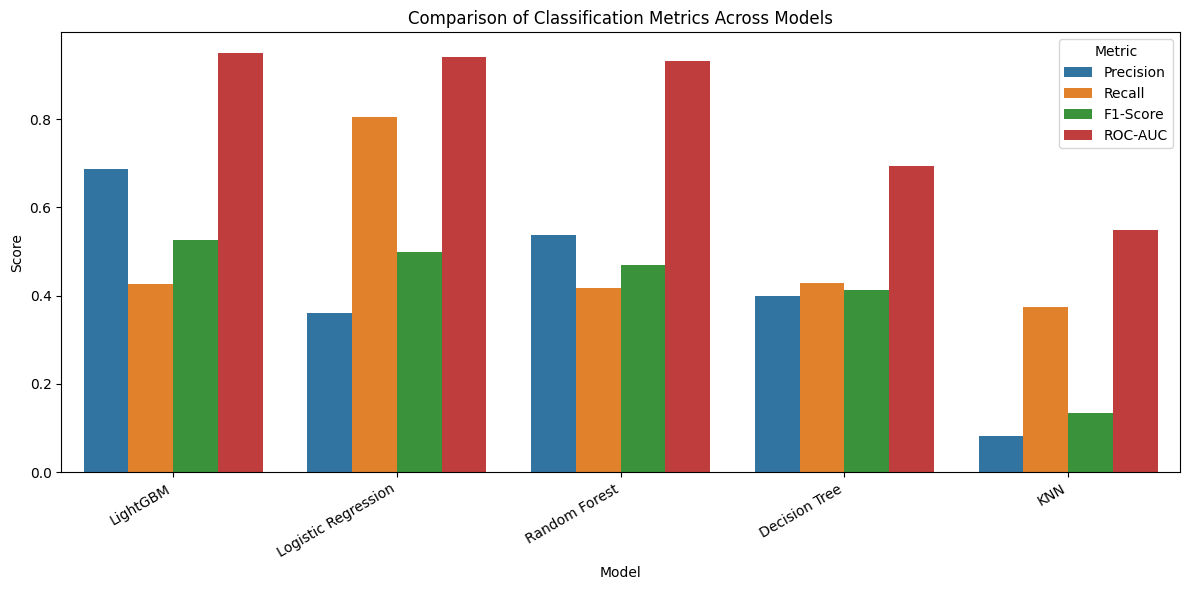

In [ ]:
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']

results_long = results_df.melt(
    id_vars='Model',
    value_vars=metrics,
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=results_long,
    x='Model',
    y='Score',
    hue='Metric'
)

plt.title('Comparison of Classification Metrics Across Models')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

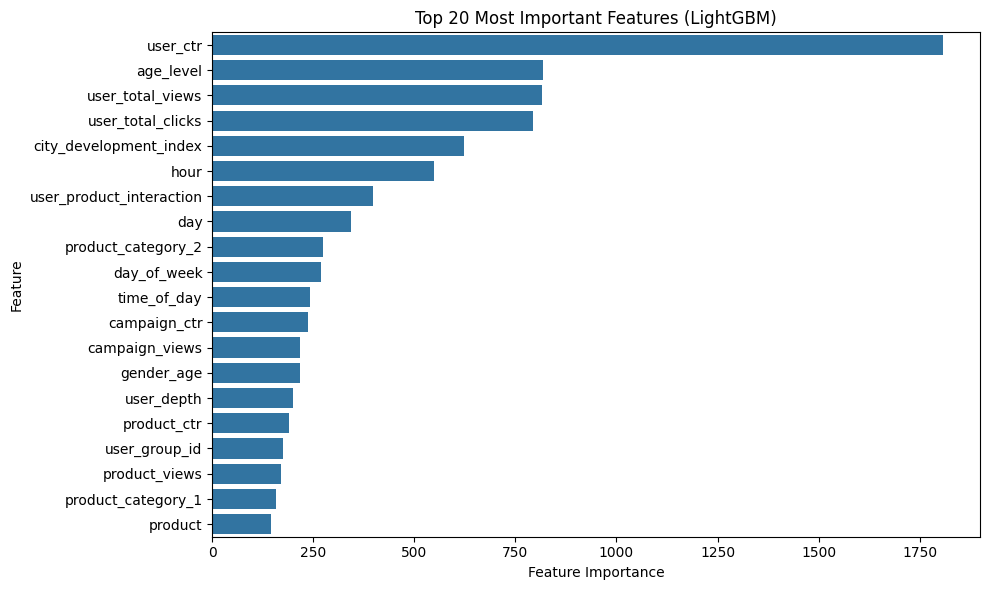

In [ ]:
best_model = models["LightGBM"]
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
})

feature_importance = feature_importance.sort_values(
    by="Importance", ascending=False
).head(20)

plt.figure(figsize=(10, 6))

sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance
)

plt.title("Top 20 Most Important Features (LightGBM)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

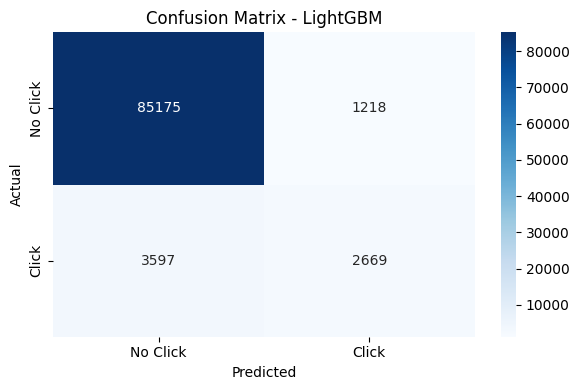

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Click', 'Click'],
    yticklabels=['No Click', 'Click']
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.tight_layout()
plt.show()


In [ ]:
Ad_click_prediction_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   product                   463291 non-null  int64  
 1   campaign_id               463291 non-null  int64  
 2   webpage_id                463291 non-null  int64  
 3   product_category_1        463291 non-null  int64  
 4   product_category_2        463291 non-null  int64  
 5   user_group_id             463291 non-null  int64  
 6   gender                    463291 non-null  int64  
 7   age_level                 463291 non-null  float64
 8   user_depth                463291 non-null  float64
 9   city_development_index    463291 non-null  float64
 10  var_1                     463291 non-null  int64  
 11  is_click                  463291 non-null  int64  
 12  hour                      463291 non-null  int32  
 13  month                     463291 non-null  i

**Q1) Do weekend users click more than weekday users?**

In [ ]:
Ad_click_prediction_train['is_weekend'].value_counts()

,count
is_weekend,
0,384246
1,79045


**Q2) Which products generate the highest CTR? Which perform poorly?**

In [ ]:
product_ctr_table = (
    Ad_click_prediction_train[['product', 'product_ctr']]
    .drop_duplicates()
    .sort_values(by='product_ctr', ascending=False)
)

product_ctr_table

,product,product_ctr
95,9,0.092700
20,3,0.071815
8,7,0.069852
0,2,0.069149
74,4,0.068712
3,8,0.064023
102,0,0.061919
9,1,0.055074
6,5,0.049094
29,6,0.046208


**Q3)Does adding personalized features such as user-product interaction help increase CTR?**

Yes, adding personalized features like user_product_interaction does appear to help increase CTR, according to our model's analysis.

Looking at the feature importances for the LightGBM model (which achieved the highest ROC-AUC score), user_product_interaction is one of the most important features. This indicates that combinations of specific users and the products they interact with are significant predictors of whether an ad will be clicked. This feature captures unique user preferences and behaviors towards certain products, which is highly valuable for predicting click-through rates.

**Q4) Based on feature importance, which factors (e.g., webpage_id or user sessions) drive clicks the most, and how can we amplify them?**

**1)user_total_views:** This highlights that users who have a history of many views are more likely to click. To amplify this, strategies could involve increasing overall user engagement with the platform or content where ads are displayed.
**2)user_ctr:** A user's individual Click-Through Rate is a strong predictor. This means users who are generally more prone to clicking on ads will continue to do so. To amplify, one could identify high-CTR users and present them with more targeted or exclusive ad content.
**3)user_total_clicks:** Similar to user_total_views, a higher number of past clicks indicates a more engaged user. This suggests identifying and nurturing users who have a demonstrated history of converting. Amplification could involve loyalty programs for users who frequently click and convert, or re-targeting these users with promotions related to their past click interests.
**4)age_level:** This demographic factor is significant, indicating that certain age groups respond differently to ads. To amplify, tailor ad creative, messaging, and product offerings to resonate specifically with the high-performing age levels.

**Q5) How effective is SMOTE in reducing false negatives for rare click events, and does it justify the increased training data size for real-time ad serving?**


In our case, given that models like LightGBM achieved a very high ROC-AUC (0.949) and a reasonable recall after SMOTE, it suggests that the technique successfully helped the model learn from the minority class without excessively compromising overall prediction accuracy, making it a viable approach even for systems requiring efficient deployment.


**Q6) How can aggregated product CTR features help forecast inventory needs for top-performing ads?**

**Identifying High-Demand Products:** A high product_ctr indicates that a specific product is highly engaging to users when shown in an ad. This directly correlates with user interest and potential demand. If an ad featuring product 'X' has a significantly higher CTR than others, it suggests that users are actively interested in that product.
**Resource Allocation for Top-Performing Ads:** Knowing which products are generating high CTRs helps in understanding which ads are truly 'top-performing'. This allows for better resource allocation. For example, if a particular ad campaign featuring product 'Y' has a consistently high product_ctr, it might warrant increased ad spend, but only if the inventory for product 'Y' can sustain the anticipated increase in purchases.

**Q7) What user profiles (e.g., by age, gender, or city) show the highest click propensity, and how should we adjust bidding strategies?**



In [ ]:
print('Click Propensity by Age Level:')
age_level_ctr = Ad_click_prediction_train.groupby('age_level')['is_click'].mean().sort_values(ascending=False)
display(age_level_ctr)

print('\nClick Propensity by Gender:')
gender_ctr = Ad_click_prediction_train.groupby('gender')['is_click'].mean().sort_values(ascending=False)
display(gender_ctr)

print('\nClick Propensity by City Development Index:')
city_dev_index_ctr = Ad_click_prediction_train.groupby('city_development_index')['is_click'].mean().sort_values(ascending=False)
display(city_dev_index_ctr)

Click Propensity by Age Level:


,is_click
age_level,
0.0,0.084967
6.0,0.082276
1.0,0.074803
5.0,0.074153
2.0,0.070919
3.0,0.065058
4.0,0.058723



Click Propensity by Gender:


,is_click
gender,
1,0.068026
0,0.064445



Click Propensity by City Development Index:


,is_click
city_development_index,
2.0,0.068896
1.0,0.066996
3.0,0.065698
4.0,0.065346


### Adjusting Bidding Strategies based on Click Propensity

Based on the analysis of click propensity by user profile, here's how we can adjust bidding strategies:

1.  **Prioritize High-CTR Segments:** For `age_level`s, `gender`s, and `city_development_index`s that show significantly higher CTRs, consider increasing your bid. This ensures that your ads are shown more frequently to users who are most likely to click, maximizing your ad spend efficiency.

2.  **Segment-Specific Ad Content:** Beyond bidding, tailor ad creatives and messaging to resonate specifically with high-propensity segments. For example, if a certain `age_level` has a high CTR, develop ads that speak directly to their interests and preferences.

3.  **Cautious Bidding for Low-CTR Segments:** For segments with lower click propensities, you might consider reducing your bids or re-evaluating your targeting strategy altogether. It could be that these segments are less responsive to your current ad campaigns, and a different approach (e.g., different ad formats, offers, or even excluding them if not cost-effective) might be needed.

4.  **Monitor and Iterate:** Bidding strategies should never be static. Continuously monitor the performance of your ads across different user profiles. The click propensities can change over time due to various factors (e.g., new campaigns, market trends, seasonality). Regular analysis and iteration are key to maintaining optimal performance.